
Simulating for graph with 10 nodes:
  Run 1: Shortest path: [0, 2, 1, 9] (hops: 3)


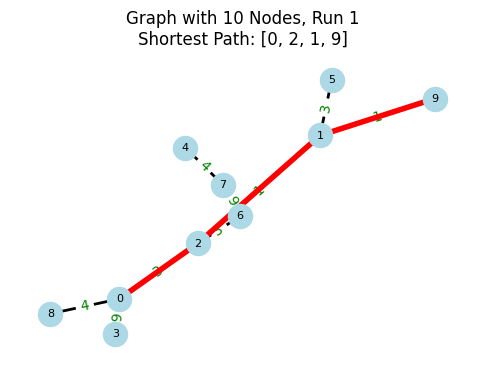

      Efficiency: 0.870, Transmissions: 115
  Run 2: Shortest path: [0, 3, 4, 1, 2, 9] (hops: 5)


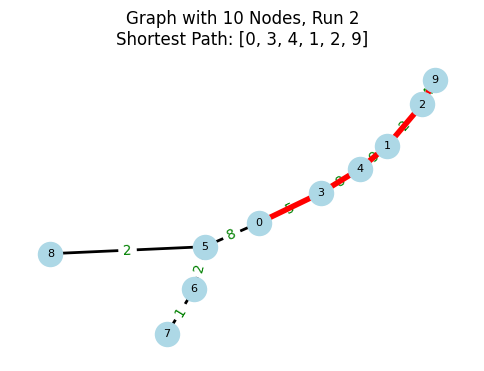

      Efficiency: 0.613, Transmissions: 163
  Run 3: Shortest path: [0, 4, 9] (hops: 2)


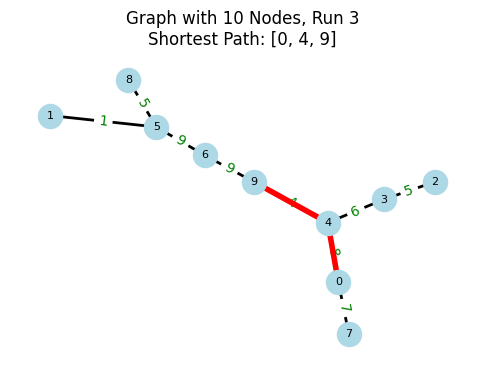

      Efficiency: 0.806, Transmissions: 124
Average efficiency for graph with 10 nodes: 0.763

Simulating for graph with 30 nodes:
  Run 1: Shortest path: [0, 11, 7, 21, 23, 17, 19, 6, 29] (hops: 8)


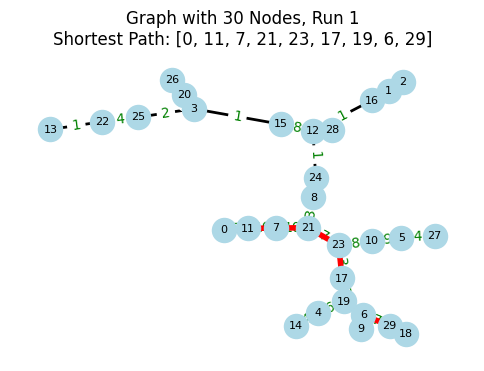

      Efficiency: 0.505, Transmissions: 198
  Run 2: Shortest path: [0, 29] (hops: 1)


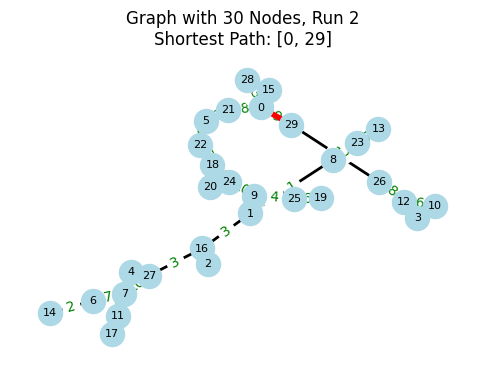

      Efficiency: 0.962, Transmissions: 104
  Run 3: Shortest path: [0, 10, 16, 8, 19, 28, 23, 13, 5, 12, 14, 4, 29] (hops: 12)


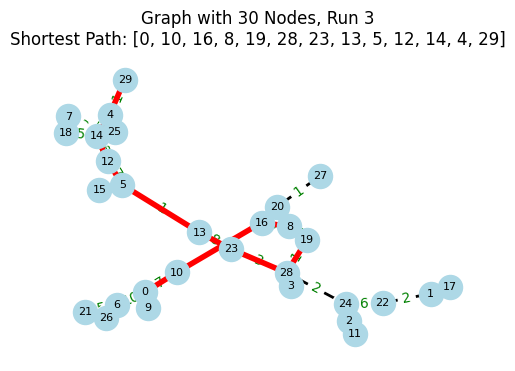

      Efficiency: 0.498, Transmissions: 201
Average efficiency for graph with 30 nodes: 0.655

Simulating for graph with 50 nodes:
  Run 1: Shortest path: [0, 36, 9, 26, 49] (hops: 4)


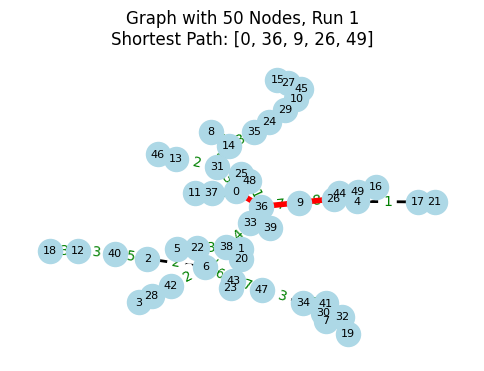

      Efficiency: 0.746, Transmissions: 134
  Run 2: Shortest path: [0, 29, 11, 37, 24, 5, 45, 1, 43, 32, 38, 34, 49] (hops: 12)


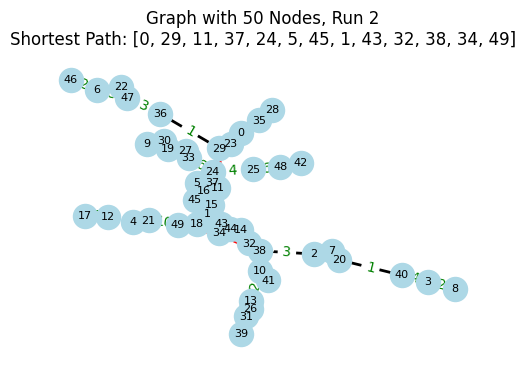

      Efficiency: 0.524, Transmissions: 191
  Run 3: Shortest path: [0, 26, 46, 7, 20, 6, 5, 49] (hops: 7)


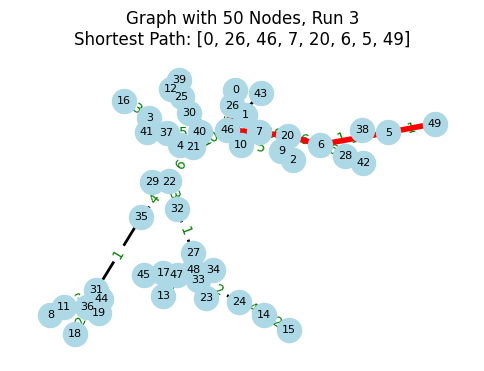

      Efficiency: 0.645, Transmissions: 155
Average efficiency for graph with 50 nodes: 0.638

Simulating for graph with 100 nodes:
  Run 1: Shortest path: [0, 70, 67, 5, 73, 16, 37, 44, 4, 99] (hops: 9)


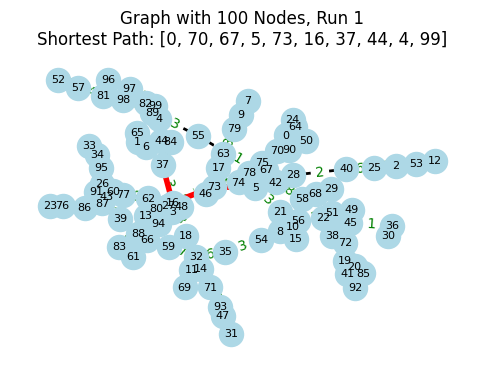

      Efficiency: 0.535, Transmissions: 187
  Run 2: Shortest path: [0, 4, 49, 14, 13, 51, 47, 50, 88, 40, 36, 45, 74, 72, 34, 24, 29, 6, 2, 56, 99] (hops: 20)


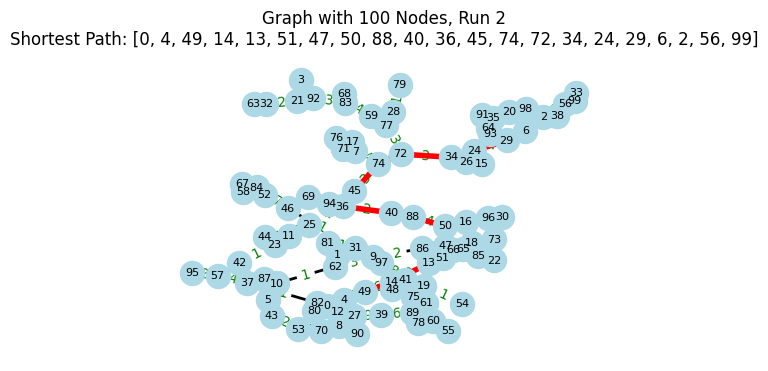

      Efficiency: 0.307, Transmissions: 326
  Run 3: Shortest path: [0, 46, 89, 92, 1, 79, 63, 59, 61, 70, 99] (hops: 10)


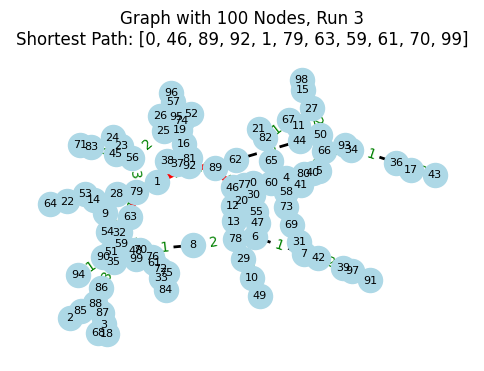

      Efficiency: 0.490, Transmissions: 204
Average efficiency for graph with 100 nodes: 0.444


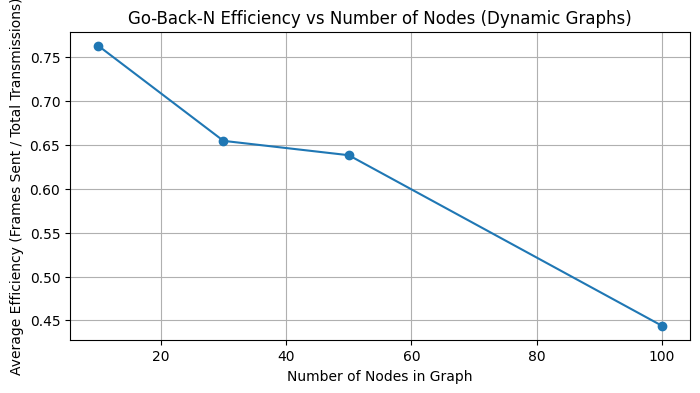

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random

# ---------------------------
# Custom Random Tree Generator using Prufer sequence method
# ---------------------------
def generate_random_tree(n, seed=None):
    if seed is not None:
        random.seed(seed)
    if n == 1:
        T = nx.Graph()
        T.add_node(0)
        return T
    prufer = [random.randint(0, n - 1) for _ in range(n - 2)]
    degree = [1] * n
    for v in prufer:
        degree[v] += 1

    tree_edges = []
    for v in prufer:
        for i in range(n):
            if degree[i] == 1:
                tree_edges.append((i, v))
                degree[i] -= 1
                degree[v] -= 1
                break
    u, v = [i for i in range(n) if degree[i] == 1]
    tree_edges.append((u, v))

    T = nx.Graph()
    T.add_nodes_from(range(n))
    T.add_edges_from(tree_edges)
    return T

# ---------------------------
# Custom Dijkstra's Algorithm (for demonstration)
# ---------------------------
def custom_dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    previous = {vertex: None for vertex in graph}
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        if current_distance > distances[current_vertex]:
            continue
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous

def reconstruct_path(previous, start, end):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous[current]
    path.reverse()
    return path if path and path[0] == start else []

# ---------------------------
# Go-Back-N ARQ Protocol Simulation
# ---------------------------
def simulate_gbn(total_frames, window_size, frame_size, base_error_prob, hops):
    effective_error_prob = 1 - (1 - base_error_prob) ** hops

    current_frame = 0
    total_transmissions = 0
    rounds = 0

    while current_frame < total_frames:
        rounds += 1
        sent_in_window = 0
        error_occurred = False

        for i in range(window_size):
            if current_frame + i >= total_frames:
                break
            total_transmissions += 1
            sent_in_window += 1
            if random.random() < effective_error_prob:
                error_occurred = True
                break

        if not error_occurred:
            current_frame += sent_in_window

    efficiency = total_frames / total_transmissions
    performance = {
        "Total Frames": total_frames,
        "Window Size": window_size,
        "Frame Size (bytes)": frame_size,
        "Base Error Probability (per hop)": base_error_prob,
        "Hops": hops,
        "Effective Error Probability": effective_error_prob,
        "Total Transmissions": total_transmissions,
        "Efficiency (Frames Sent / Total Transmissions)": efficiency,
        "Rounds": rounds
    }
    return performance

# ---------------------------
# Simulation Over Different Node Counts with Dynamic Graphs
# ---------------------------
TOTAL_FRAMES = 100
WINDOW_SIZE = 5
FRAME_SIZE = 1024  # bytes
BASE_ERROR_PROB = 0.02  # 2% error probability per hop
simulation_runs = 3

node_counts = [10, 30, 50, 100]
avg_efficiencies = []

for n in node_counts:
    efficiency_sum = 0
    print(f"\nSimulating for graph with {n} nodes:")

    for run in range(simulation_runs):
        seed_val = random.randint(0, 10000)
        graph_tree = generate_random_tree(n, seed=seed_val)

        for (u, v) in graph_tree.edges():
            weight = random.randint(1, 10)
            graph_tree.edges[u, v]['weight'] = weight

        source, destination = 0, n - 1

        try:
            shortest_path = nx.dijkstra_path(graph_tree, source=source, target=destination, weight='weight')
        except nx.NetworkXNoPath:
            print("No path found, skipping this run.")
            continue

        hops = len(shortest_path) - 1
        print(f"  Run {run+1}: Shortest path: {shortest_path} (hops: {hops})")

        pos = nx.spring_layout(graph_tree)
        plt.figure(figsize=(6, 4))
        # Reduce node size to 300 and font size to 8
        nx.draw_networkx_nodes(graph_tree, pos, node_size=300, node_color='lightblue')
        nx.draw_networkx_edges(graph_tree, pos, width=2)
        nx.draw_networkx_labels(graph_tree, pos, font_size=8)
        edge_labels = nx.get_edge_attributes(graph_tree, 'weight')
        nx.draw_networkx_edge_labels(graph_tree, pos, edge_labels=edge_labels, font_color='green')
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(graph_tree, pos, edgelist=path_edges, width=4, edge_color='red')
        plt.title(f"Graph with {n} Nodes, Run {run+1}\nShortest Path: {shortest_path}")
        plt.axis("off")
        plt.show()

        perf = simulate_gbn(TOTAL_FRAMES, WINDOW_SIZE, FRAME_SIZE, BASE_ERROR_PROB, hops)
        efficiency_sum += perf["Efficiency (Frames Sent / Total Transmissions)"]
        print(f"      Efficiency: {perf['Efficiency (Frames Sent / Total Transmissions)']:.3f}, "
              f"Transmissions: {perf['Total Transmissions']}")

    avg_eff = efficiency_sum / simulation_runs
    avg_efficiencies.append(avg_eff)
    print(f"Average efficiency for graph with {n} nodes: {avg_eff:.3f}")

plt.figure(figsize=(8, 4))
plt.plot(node_counts, avg_efficiencies, marker='o', linestyle='-')
plt.xlabel("Number of Nodes in Graph")
plt.ylabel("Average Efficiency (Frames Sent / Total Transmissions)")
plt.title("Go-Back-N Efficiency vs Number of Nodes (Dynamic Graphs)")
plt.grid(True)
plt.show()


--- n = 10, k = 4 connected graph ---
 Run 1: path [0, 1, 9] (hops=2)


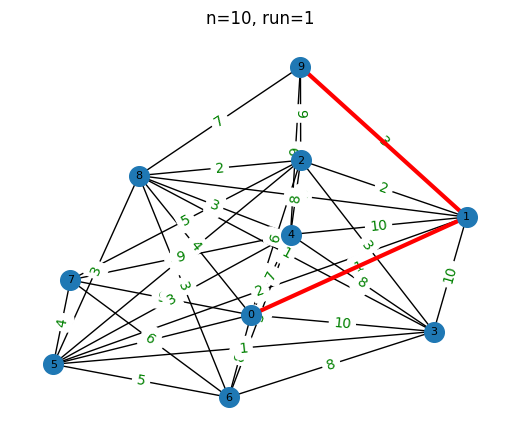

   Efficiency=1.000, Tx=50
 Run 2: path [0, 6, 9] (hops=2)


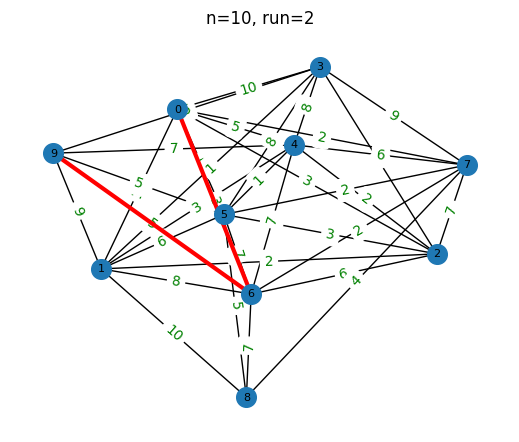

   Efficiency=0.962, Tx=52
 Run 3: path [0, 9] (hops=1)


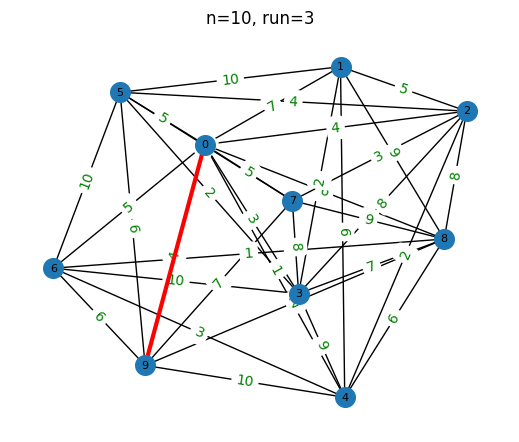

   Efficiency=1.000, Tx=50
 → Avg efficiency for n=10: 0.987

--- n = 30, k = 4 connected graph ---
 Run 1: path [0, 7, 6, 29] (hops=3)


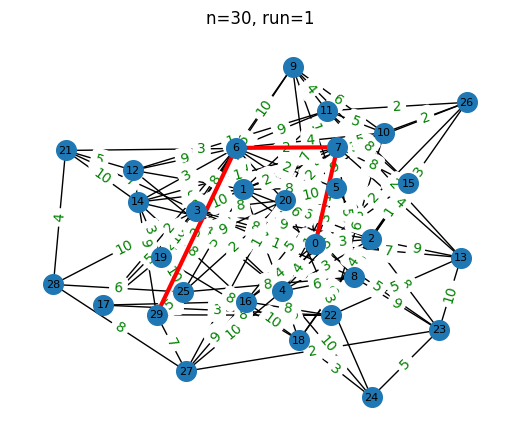

   Efficiency=0.980, Tx=51
 Run 2: path [0, 8, 29] (hops=2)


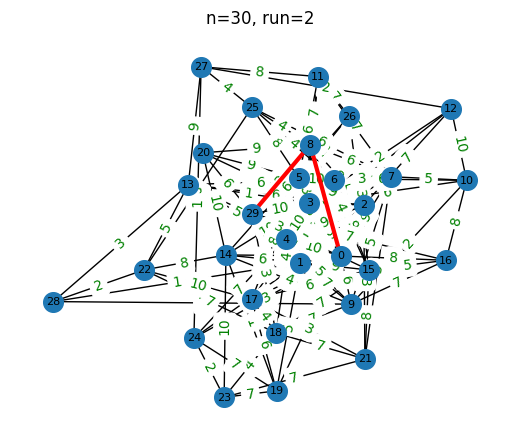

   Efficiency=1.000, Tx=50
 Run 3: path [0, 6, 5, 29] (hops=3)


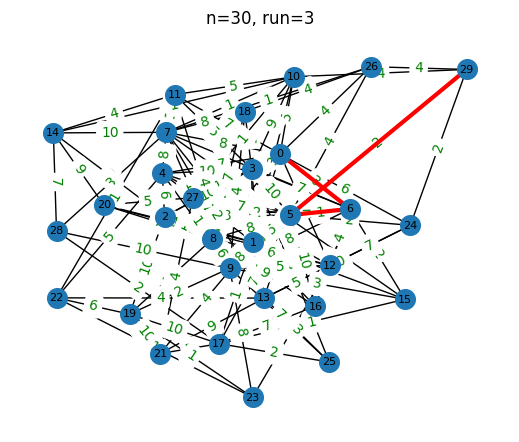

   Efficiency=0.877, Tx=57
 → Avg efficiency for n=30: 0.953

--- n = 50, k = 4 connected graph ---
 Run 1: path [0, 2, 49] (hops=2)


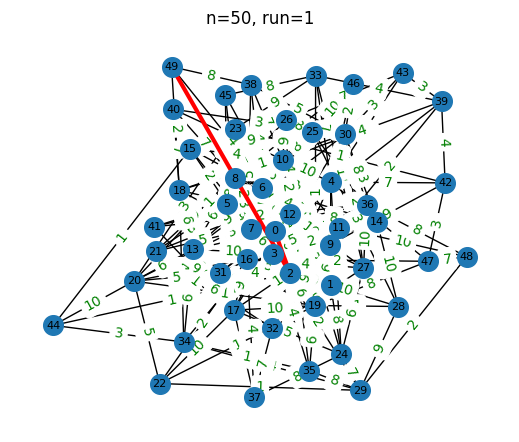

   Efficiency=1.000, Tx=50
 Run 2: path [0, 43, 12, 49] (hops=3)


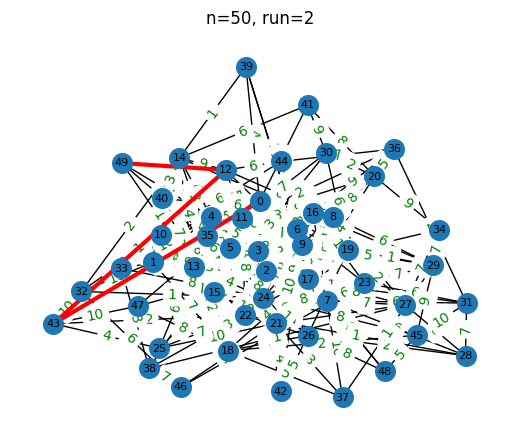

   Efficiency=0.926, Tx=54
 Run 3: path [0, 41, 49] (hops=2)


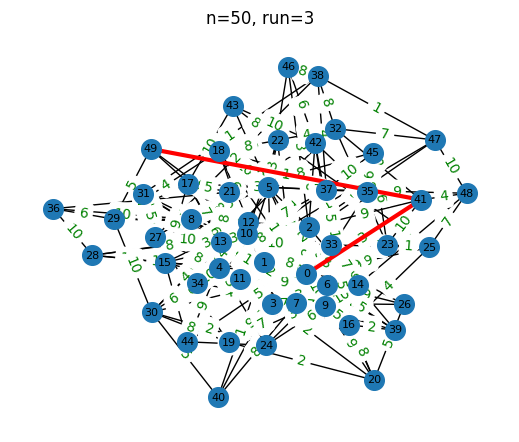

   Efficiency=0.943, Tx=53
 → Avg efficiency for n=50: 0.956

--- n = 100, k = 4 connected graph ---
 Run 1: path [0, 5, 48, 70, 99] (hops=4)


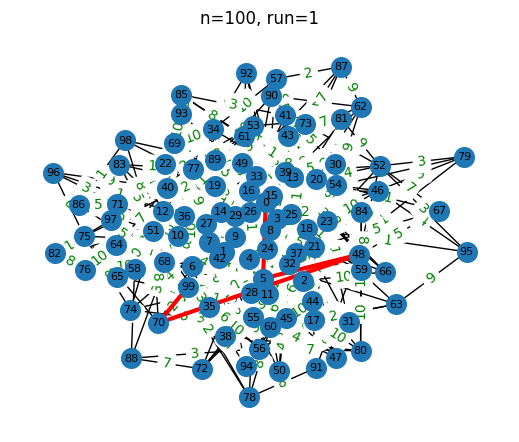

   Efficiency=0.794, Tx=63
 Run 2: path [0, 99] (hops=1)


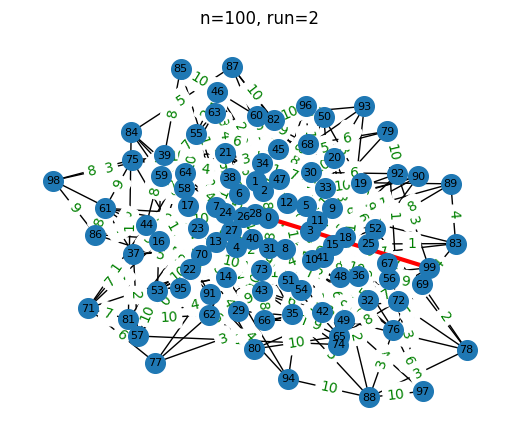

   Efficiency=0.962, Tx=52
 Run 3: path [0, 45, 36, 99] (hops=3)


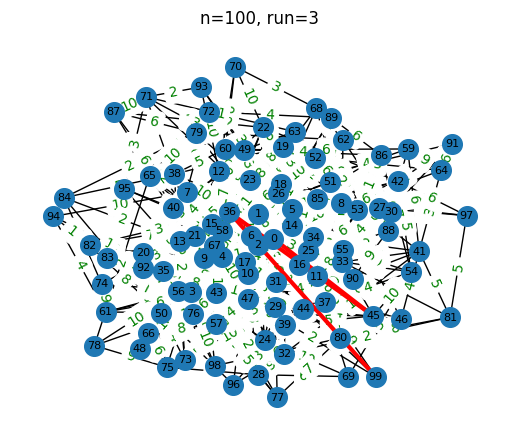

   Efficiency=0.833, Tx=60
 → Avg efficiency for n=100: 0.863


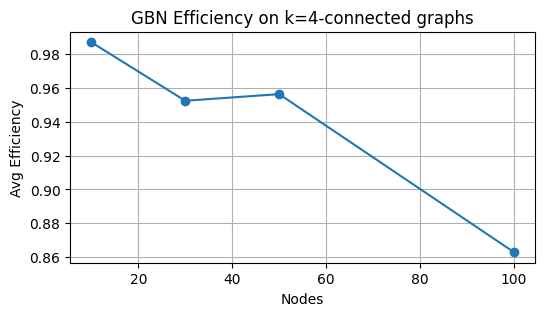

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random

# ---------------------------
# Generate a k‑vertex‑connected graph
# ---------------------------
def generate_k_connected_graph(n, k, extra_edges=0, seed=None):
    """
    Builds an n‑node graph that is guaranteed k‑vertex‑connected by:
      1) Starting with a clique on k+1 nodes (which is k‑connected).
      2) For each new node, connecting it to k random existing nodes.
      3) (Optional) Adding `extra_edges` random edges for more redundancy.
    """
    if seed is not None:
        random.seed(seed)
    if k >= n:
        raise ValueError("k must be strictly less than n")

    # 1) start with clique on nodes 0..k
    G = nx.complete_graph(k+1)

    # 2) attach each new node to k existing nodes
    for new_node in range(k+1, n):
        G.add_node(new_node)
        # pick k distinct existing nodes
        targets = random.sample(list(G.nodes())[:-1], k)
        for t in targets:
            G.add_edge(new_node, t)

    # 3) optional extra edges
    potential = [(u, v) for u in range(n) for v in range(u+1, n) if not G.has_edge(u, v)]
    random.shuffle(potential)
    for (u, v) in potential[:extra_edges]:
        G.add_edge(u, v)

    return G

def custom_dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    previous = {vertex: None for vertex in graph}
    pq = [(0, start)]
    while pq:
        cd, cv = heapq.heappop(pq)
        if cd > distances[cv]:
            continue
        for nbr, w in graph[cv].items():
            d = cd + w
            if d < distances[nbr]:
                distances[nbr] = d
                previous[nbr] = cv
                heapq.heappush(pq, (d, nbr))
    return distances, previous

def reconstruct_path(prev, start, end):
    path, cur = [], end
    while cur is not None:
        path.append(cur)
        cur = prev[cur]
    path.reverse()
    return path if path and path[0]==start else []

def simulate_gbn(total_frames, window_size, frame_size, base_error_prob, hops):
    eff_err = 1 - (1 - base_error_prob)**hops
    cf = 0; tx = 0; rounds = 0
    while cf < total_frames:
        rounds += 1
        sent = 0; err = False
        for i in range(window_size):
            if cf + i >= total_frames: break
            tx += 1; sent += 1
            if random.random() < eff_err:
                err = True; break
        if not err:
            cf += sent
    return {
        "Total Frames": total_frames,
        "Window Size": window_size,
        "Hops": hops,
        "Effective Error Prob": eff_err,
        "Total Transmissions": tx,
        "Efficiency": total_frames/tx,
        "Rounds": rounds
    }

# ---------------------------
# Simulation Over Different Node Counts
# ---------------------------
if __name__ == "__main__":
    TOTAL_FRAMES   = 50
    WINDOW_SIZE    = 5
    FRAME_SIZE     = 256
    BASE_ERR_PROB  = 0.02
    SIM_RUNS       = 3
    K_CONNECTIVITY = 4       # <-- change this to your desired k
    EXTRA_EDGES    = 5       # additional random edges

    node_counts = [10, 30, 50, 100]
    avg_eff    = []

    for n in node_counts:
        sum_eff = 0
        print(f"\n--- n = {n}, k = {K_CONNECTIVITY} connected graph ---")
        for run in range(1, SIM_RUNS+1):
            seed = random.randint(0, 1e6)
            G = generate_k_connected_graph(n, K_CONNECTIVITY,
                                           extra_edges=EXTRA_EDGES,
                                           seed=seed)

            # weight edges
            for u,v in G.edges():
                G.edges[u,v]['weight'] = random.randint(1,10)

            src, dst = 0, n-1
            try:
                path = nx.dijkstra_path(G, src, dst, weight='weight')
            except nx.NetworkXNoPath:
                print(f" Run {run}: no path (shouldn't happen in k‑connected graph!)")
                continue

            hops = len(path)-1
            print(f" Run {run}: path {path} (hops={hops})")

            # visualize
            pos = nx.spring_layout(G, seed=seed)
            plt.figure(figsize=(5,4))
            nx.draw(G, pos, node_size=200, labels={i:str(i) for i in G}, font_size=8)
            elab = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G,pos,edge_labels=elab,font_color='green')
            nx.draw_networkx_edges(G,pos,edgelist=list(zip(path,path[1:])),
                                   width=3,edge_color='red')
            plt.title(f"n={n}, run={run}")
            plt.axis('off')
            plt.show()

            perf = simulate_gbn(TOTAL_FRAMES, WINDOW_SIZE,
                                 FRAME_SIZE, BASE_ERR_PROB, hops)
            sum_eff += perf["Efficiency"]
            print(f"   Efficiency={perf['Efficiency']:.3f}, Tx={perf['Total Transmissions']}")

        avg = sum_eff / SIM_RUNS
        avg_eff.append(avg)
        print(f" → Avg efficiency for n={n}: {avg:.3f}")

    # summary plot
    plt.figure(figsize=(6,3))
    plt.plot(node_counts, avg_eff, marker='o')
    plt.xlabel("Nodes")
    plt.ylabel("Avg Efficiency")
    plt.title(f"GBN Efficiency on k={K_CONNECTIVITY}-connected graphs")
    plt.grid(True)
    plt.show()


In [ ]:
pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.1 MB/s eta 0:00:00


In [ ]:
from scapy.all import Packet, ByteField, ShortField, StrFixedLenField
import random

# ----------------------------
# 1) Packet & Checksum Helpers
# ----------------------------
class ARQPacket(Packet):
    name = "ARQPacket"
    fields_desc = [
        ByteField("seq_num", 0),
        ByteField("flag",    0),    # 0=data, 1=ACK
        ShortField("checksum", 0),
        StrFixedLenField("data", b"", length=8)
    ]

def compute_checksum(pkt: ARQPacket) -> int:
    orig = pkt.checksum
    pkt.checksum = 0
    raw = bytes(pkt)
    pkt.checksum = orig
    return sum(raw) % 65536

def create_packet(seq: int, data: bytes) -> ARQPacket:
    pkt = ARQPacket(seq_num=seq, flag=0, data=data)
    pkt.checksum = compute_checksum(pkt)
    return pkt

def maybe_corrupt(pkt: ARQPacket, p: float) -> ARQPacket:
    if random.random() < p:
        pkt.data = b"CORRUPT!"
    return pkt

# ----------------------------
# 1a) Sliding‑Window Printer
# ----------------------------
def print_window(base, window_size, total_frames, acked=None):
    end = min(base + window_size, total_frames)
    if acked is None:
        window = list(range(base, end))
        print(f"Window = {window}   (base={base})")
    else:
        display = []
        for i in range(base, end):
            mark = 'A' if acked[i] else ' '
            display.append(f"{i}[{mark}]")
        print(f"Window = {display}   (base={base})")

# ----------------------------
# 2) Go‑Back‑N (Immediate ACK & Full‑Window Retransmit)
# ----------------------------
def go_back_n_arq(window_size, total_frames, error_prob=None, loss_interval=None):
    base = 0
    next_seq = 0
    transmissions = 0
    data = [f"Frame{i}".encode().ljust(8, b'-') for i in range(total_frames)]

    print("\n=== Go‑Back‑N ARQ (Immediate ACK & Full‑Window Retransmit) ===")
    while base < total_frames:
        print()
        print_window(base, window_size, total_frames)

        # send one frame at a time
        while next_seq < total_frames and next_seq < base + window_size:
            pkt = create_packet(next_seq, data[next_seq])
            transmissions += 1

            # decide loss
            lost = False
            if loss_interval and transmissions % loss_interval == 0:
                lost = True
            elif error_prob and random.random() < error_prob:
                lost = True

            if lost:
                print(f" Sent Frame {next_seq}: ❌ LOST")
                print(f"  Receiver → NAK {next_seq}")
                # Go‑Back‑N: retransmit entire window
                win = list(range(base, min(base+window_size, total_frames)))
                print(f"  → Retransmit frames {win}")
                next_seq = base
                break
            else:
                print(f" Sent Frame {next_seq}: ✅")
                print(f"  Receiver → ACK {next_seq}")
                # cumulative ACK
                ack_n = next_seq + 1
                if ack_n > base:
                    base = ack_n
                    print(f"  → slide base to {base}")
                    print_window(base, window_size, total_frames)
                next_seq += 1

    print(f"\nTotal transmissions: {transmissions}")
    return transmissions

# ----------------------------
# 3) Selective‑Repeat (Immediate Window Update)
# ----------------------------
def selective_repeat_arq(window_size, total_frames, error_prob=None, loss_interval=None):
    base = 0
    acked = [False] * total_frames
    transmissions = 0
    retrans = 0
    data = [f"Frame{i}".encode().ljust(8, b'-') for i in range(total_frames)]

    print("\n=== Selective Repeat ARQ (Immediate Window Update) ===")
    while base < total_frames:
        print()
        print_window(base, window_size, total_frames, acked)
        end = min(base + window_size, total_frames)

        # send each un‑ACKed in window
        for i in range(base, end):
            if acked[i]:
                continue

            pkt = create_packet(i, data[i])
            transmissions += 1

            # decide loss
            lost = False
            if loss_interval and transmissions % loss_interval == 0:
                lost = True
            elif error_prob and random.random() < error_prob:
                lost = True

            if lost:
                print(f"  Sent Frame {i}: ❌ LOST")
                print(f"  Receiver → NAK {i}")
                retrans += 1
            else:
                print(f"  Sent Frame {i}: ✅")
                print(f"  Receiver → ACK {i}")
                acked[i] = True

                # slide base past all consecutive ACKed
                old_base = base
                while base < total_frames and acked[base]:
                    base += 1
                if base != old_base:
                    print(f"  → slide base to {base}")
                print_window(base, window_size, total_frames, acked)

        # end for window

    print(f"\nTotal transmissions: {transmissions}")
    return retrans

# ----------------------------
# 4) Run & Compare
# ----------------------------
if __name__ == "__main__":
    random.seed(42)
    TOTAL_FRAMES = 10
    WINDOW_SIZE  = 4

    # 20% random loss
    gbn_retx = go_back_n_arq(WINDOW_SIZE, TOTAL_FRAMES, error_prob=0.2)
    sr_retx  = selective_repeat_arq(WINDOW_SIZE, TOTAL_FRAMES, error_prob=0.2)

    print("\n=== Summary ===")
    print(f"Go‑Back‑N Retransmissions:       {gbn_retx}")
    print(f"Selective Repeat Retransmissions: {sr_retx}")



=== Go‑Back‑N ARQ (Immediate ACK & Full‑Window Retransmit) ===

Window = [0, 1, 2, 3]   (base=0)
 Sent Frame 0: ✅
  Receiver → ACK 0
  → slide base to 1
Window = [1, 2, 3, 4]   (base=1)
 Sent Frame 1: ❌ LOST
  Receiver → NAK 1
  → Retransmit frames [1, 2, 3, 4]

Window = [1, 2, 3, 4]   (base=1)
 Sent Frame 1: ✅
  Receiver → ACK 1
  → slide base to 2
Window = [2, 3, 4, 5]   (base=2)
 Sent Frame 2: ✅
  Receiver → ACK 2
  → slide base to 3
Window = [3, 4, 5, 6]   (base=3)
 Sent Frame 3: ✅
  Receiver → ACK 3
  → slide base to 4
Window = [4, 5, 6, 7]   (base=4)
 Sent Frame 4: ✅
  Receiver → ACK 4
  → slide base to 5
Window = [5, 6, 7, 8]   (base=5)
 Sent Frame 5: ✅
  Receiver → ACK 5
  → slide base to 6
Window = [6, 7, 8, 9]   (base=6)
 Sent Frame 6: ❌ LOST
  Receiver → NAK 6
  → Retransmit frames [6, 7, 8, 9]

Window = [6, 7, 8, 9]   (base=6)
 Sent Frame 6: ✅
  Receiver → ACK 6
  → slide base to 7
Window = [7, 8, 9]   (base=7)
 Sent Frame 7: ❌ LOST
  Receiver → NAK 7
  → Retransmit frames

Packet Forwarding Rate: 2.00%
Avg End-to-End Delay: 470.16
Packets Dropped: 196


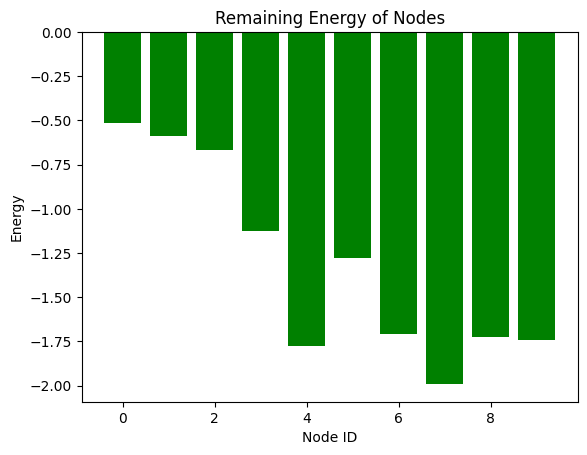

In [ ]:
import random
import matplotlib.pyplot as plt

class Node:
    def __init__(self, node_id):
        self.id = node_id
        self.energy = 100  # energy units
        self.active = True
        self.role = None  # FAN or RAN
        self.neighbors = []
        self.forwarding_index = 0

    def update_role(self):
        self.role = "RAN" if self.energy > 60 else "FAN"

    def calculate_forwarding_index(self, delay, link_quality):
        # Lower delay, better link quality → higher index
        self.forwarding_index = (1 / delay) * link_quality * (self.energy / 100)

class Network:
    def __init__(self, size):
        self.nodes = [Node(i) for i in range(size)]
        self.link_quality_matrix = self.init_link_quality(size)
        self.delay_matrix = self.init_delay_matrix(size)
        self.path_log = []

    def init_link_quality(self, size):
        return [[random.uniform(0.6, 1.0) if i != j else 0 for j in range(size)] for i in range(size)]

    def init_delay_matrix(self, size):
        return [[random.uniform(1, 10) if i != j else 0 for j in range(size)] for i in range(size)]

    def update_nodes(self):
        for i, node in enumerate(self.nodes):
            node.update_role()
            for j, _ in enumerate(self.nodes):
                if i != j:
                    node.calculate_forwarding_index(self.delay_matrix[i][j], self.link_quality_matrix[i][j])

    def select_next_hop(self, current_id):
        neighbors = [(j, self.nodes[j].forwarding_index) for j in range(len(self.nodes)) if j != current_id]
        neighbors = sorted(neighbors, key=lambda x: x[1], reverse=True)
        for nid, _ in neighbors:
            if self.nodes[nid].active and self.nodes[nid].energy > 0:
                return nid
        return None

    def send_packet(self, source, destination):
        path = [source]
        current = source
        delay_sum = 0

        while current != destination:
            next_hop = self.select_next_hop(current)
            if next_hop is None:
                return None, float('inf')  # packet dropped

            delay = self.delay_matrix[current][next_hop]
            energy_used = random.uniform(1, 3)
            self.nodes[next_hop].energy -= energy_used
            if self.nodes[next_hop].energy <= 0:
                self.nodes[next_hop].active = False

            path.append(next_hop)
            delay_sum += delay
            current = next_hop

        return path, delay_sum

    def run_simulation(self, rounds=100):
        success_count = 0
        total_delay = 0
        dropped = 0

        for _ in range(rounds):
            self.update_nodes()
            source = random.randint(0, len(self.nodes) - 1)
            destination = random.randint(0, len(self.nodes) - 1)
            while destination == source:
                destination = random.randint(0, len(self.nodes) - 1)

            path, delay = self.send_packet(source, destination)
            if path:
                success_count += 1
                total_delay += delay
                self.path_log.append(path)
            else:
                dropped += 1

        print(f"Packet Forwarding Rate: {success_count / rounds * 100:.2f}%")
        print(f"Avg End-to-End Delay: {total_delay / success_count if success_count > 0 else 0:.2f}")
        print(f"Packets Dropped: {dropped}")
        self.plot_node_energy()

    def plot_node_energy(self):
        energies = [node.energy for node in self.nodes]
        plt.bar(range(len(energies)), energies, color="green")
        plt.title("Remaining Energy of Nodes")
        plt.xlabel("Node ID")
        plt.ylabel("Energy")
        plt.show()


# Run the simulation
network = Network(size=10)
network.run_simulation(rounds=200)


In [ ]:
pip install simpy


[0.00] Generating Packet 0 from Node 1 to Node 2
[2.11] Packet 0 moved from Node 1 ➝ Node 4 (delay 2.11)
[3.58] Packet 0 moved from Node 4 ➝ Node 2 (delay 1.47)
[3.58] Packet 0 reached destination 2 in 3.58 units
[5.00] Generating Packet 1 from Node 5 to Node 1
[6.09] Packet 1 moved from Node 5 ➝ Node 8 (delay 1.09)
[7.74] Packet 1 moved from Node 8 ➝ Node 5 (delay 1.65)
[8.83] Packet 1 moved from Node 5 ➝ Node 8 (delay 1.09)
[10.00] Generating Packet 2 from Node 6 to Node 2
[10.48] Packet 1 moved from Node 8 ➝ Node 5 (delay 1.65)
[11.56] Packet 1 moved from Node 5 ➝ Node 8 (delay 1.09)
[11.82] Packet 2 moved from Node 6 ➝ Node 0 (delay 1.82)
[13.21] Packet 1 moved from Node 8 ➝ Node 5 (delay 1.65)
[13.24] Packet 2 moved from Node 0 ➝ Node 4 (delay 1.42)
[14.30] Packet 1 moved from Node 5 ➝ Node 8 (delay 1.09)
[14.71] Packet 2 moved from Node 4 ➝ Node 2 (delay 1.47)
[14.71] Packet 2 reached destination 2 in 4.71 units
[15.00] Generating Packet 3 from Node 0 to Node 3
[15.95] Packet 1 m

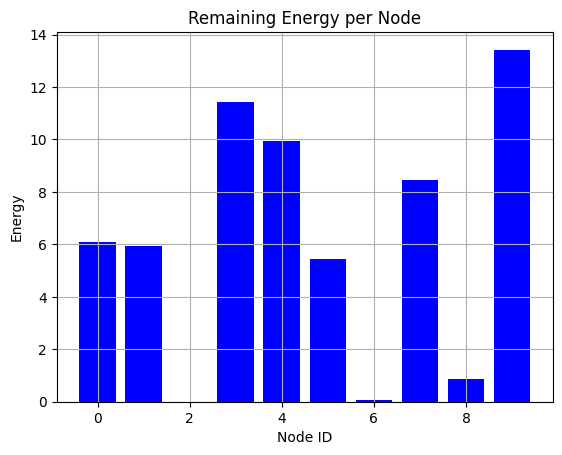

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# ------------------------------
# Data structures and classes
# ------------------------------

class Packet:
    def __init__(self, pkt_id, source, destination):
        self.id = pkt_id
        self.source = source
        self.destination = destination
        self.delay = 0  # total delay

class Node:
    def __init__(self, node_id):
        self.id = node_id
        self.energy = 100.0     # initial energy
        self.active = True
        self.role = "RAN"

    def update_role(self):
        self.role = "RAN" if self.energy > 60 else "FAN"

    def consume_energy(self, amount):
        self.energy -= amount
        if self.energy <= 0:
            self.energy = 0
            self.active = False

class NetworkSim:
    def __init__(self, env, size):
        self.env = env
        self.size = size
        self.nodes = [Node(i) for i in range(size)]

        # Random link delay between nodes
        self.delay_matrix = [[random.uniform(1, 10) if i != j else 0 for j in range(size)]
                             for i in range(size)]
        # Random link quality values
        self.link_quality = [[random.uniform(0.6, 1.0) if i != j else 0 for j in range(size)]
                             for i in range(size)]

    def update_nodes(self):
        for node in self.nodes:
            node.update_role()

    def select_next_hop(self, current_id, destination_id):
        candidates = []
        for j in range(self.size):
            if j != current_id and self.nodes[j].active:
                delay = self.delay_matrix[current_id][j]
                quality = self.link_quality[current_id][j]
                energy_factor = self.nodes[j].energy / 100.0
                index = (1 / delay) * quality * energy_factor
                candidates.append((j, index))
        if not candidates:
            return None
        candidates.sort(key=lambda x: x[1], reverse=True)
        return candidates[0][0]

    def transmit_packet(self, packet, current_id, destination_id, results, dropped):
        if current_id == destination_id:
            print(f"[{self.env.now:.2f}] Packet {packet.id} reached destination {destination_id} in {packet.delay:.2f} units")
            results.append(packet.delay)
            return

        next_hop = self.select_next_hop(current_id, destination_id)
        if next_hop is None:
            print(f"[{self.env.now:.2f}] Packet {packet.id} dropped at Node {current_id} (no active neighbors)")
            dropped.append(packet.id)
            return

        link_delay = self.delay_matrix[current_id][next_hop]
        yield self.env.timeout(link_delay)
        packet.delay += link_delay

        energy_used = random.uniform(1, 3)
        self.nodes[next_hop].consume_energy(energy_used)

        if not self.nodes[next_hop].active:
            print(f"[{self.env.now:.2f}] Node {next_hop} ran out of energy and is now inactive.")

        print(f"[{self.env.now:.2f}] Packet {packet.id} moved from Node {current_id} ➝ Node {next_hop} (delay {link_delay:.2f})")
        self.env.process(self.transmit_packet(packet, next_hop, destination_id, results, dropped))

    def generate_packet(self, pkt_id):
        src = random.randint(0, self.size - 1)
        dst = random.randint(0, self.size - 1)
        while dst == src:
            dst = random.randint(0, self.size - 1)
        packet = Packet(pkt_id, src, dst)
        print(f"[{self.env.now:.2f}] Generating Packet {pkt_id} from Node {src} to Node {dst}")
        return packet, src, dst

# ------------------------------
# Packet Generator Process
# ------------------------------

def packet_generator(env, network, num_packets, interval, results, dropped):
    for pkt_id in range(num_packets):
        network.update_nodes()
        packet, src, dst = network.generate_packet(pkt_id)
        env.process(network.transmit_packet(packet, src, dst, results, dropped))
        yield env.timeout(interval)

# ------------------------------
# Run Simulation
# ------------------------------

def run_simulation():
    SIM_TIME = 500
    NUM_NODES = 10
    NUM_PACKETS = 50
    PACKET_INTERVAL = 5

    env = simpy.Environment()
    network = NetworkSim(env, NUM_NODES)
    results = []
    dropped = []

    env.process(packet_generator(env, network, NUM_PACKETS, PACKET_INTERVAL, results, dropped))
    env.run(until=SIM_TIME)

    delivered = len(results)
    print("\n📊 Simulation Summary:")
    print(f"  ✔ Packets Delivered: {delivered}/{NUM_PACKETS}")
    if delivered > 0:
        print(f"  ⏱ Average Delay: {sum(results)/delivered:.2f} time units")
    print(f"  ❌ Packets Dropped: {len(dropped)}")

    # Plot energy chart
    energies = [node.energy for node in network.nodes]
    plt.bar(range(NUM_NODES), energies, color="blue")
    plt.title("Remaining Energy per Node")
    plt.xlabel("Node ID")
    plt.ylabel("Energy")
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    run_simulation()
